# Test 14 

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib.pyplot as plt

sys.path.insert(0, '../../../icenumerics/')
sys.path.insert(0, '../auxnumerics/')

import icenumerics as ice
import auxiliary as aux

from parameters import params

%reload_ext autoreload
%autoreload 2

ureg = ice.ureg
idx = pd.IndexSlice

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [4]:
DATA_PATH = '../../data/test14'

## Sanity check

Just checking the the field profile is correct

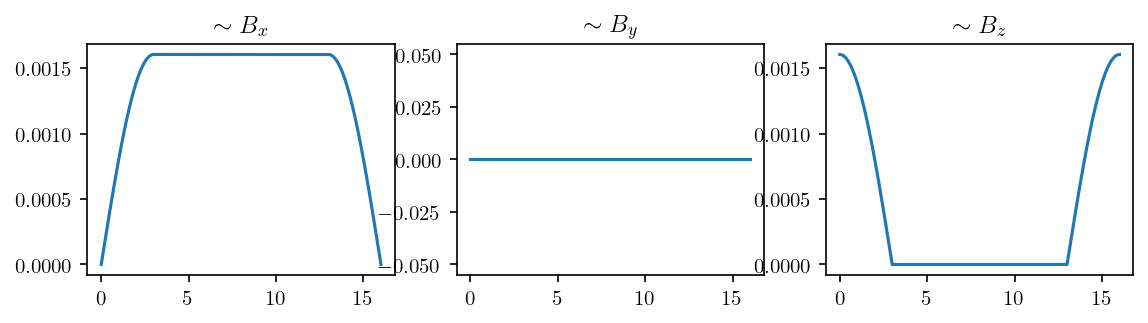

In [7]:
ctrj_raw = pd.read_csv(os.path.join(DATA_PATH,'10','trj/trj10.csv'), index_col=[0,1])

fig, axes = plt.subplots(1,3,figsize=(9,2),dpi=150)

ax = axes[0]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"mux"]))
ax.set_title("$\\sim B_x$")

ax = axes[1]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muy"]))
ax.set_title("$\\sim B_y$")

ax = axes[2]
ax.plot(np.array(ctrj_raw.loc[idx[:,1],"t"]),np.array(ctrj_raw.loc[idx[:,1],"muz"]))
ax.set_title("$\\sim B_z$")

plt.show()

## Vertex counting

In [11]:
raw_data = pd.read_csv(os.path.join(DATA_PATH,'10','average_counts.csv'))
types = ['I','II','III','IV','V','VI']
types

['I', 'II', 'III', 'IV', 'V', 'VI']

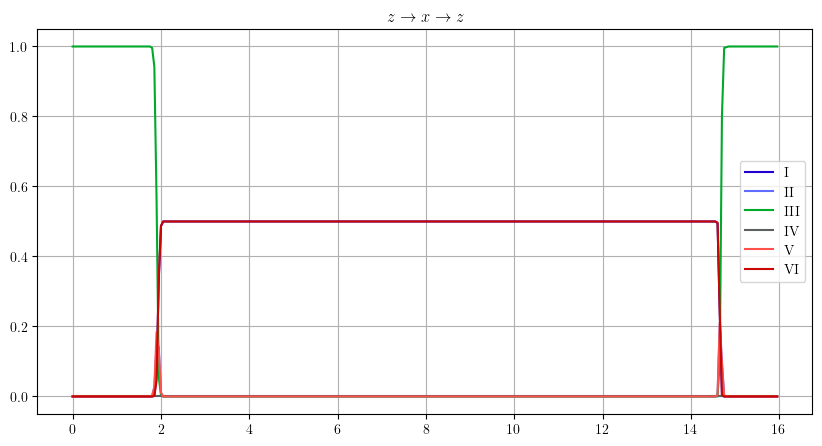

In [14]:
colors = ['#2200cf','#606cff', '#00a92a', '#5d6061', '#ff514c','#ca0600'  ]
fig, ax = plt.subplots(figsize=(10,5))

for vtype, c in zip(types,colors):
    ax.plot(raw_data.time.to_list(),raw_data[vtype],color=c,label=vtype)

ax.set_title('$z\\to x\\to z$')
ax.grid()
ax.legend()
plt.show()

In [26]:
N = 10
kappas = pd.read_csv(os.path.join(DATA_PATH,'10','kappa.csv'),index_col=['realization','t'])
kappa_av = []
for r,ctime in kappas.groupby('t'):
    kappa_av.append(np.mean(ctime.kappa))

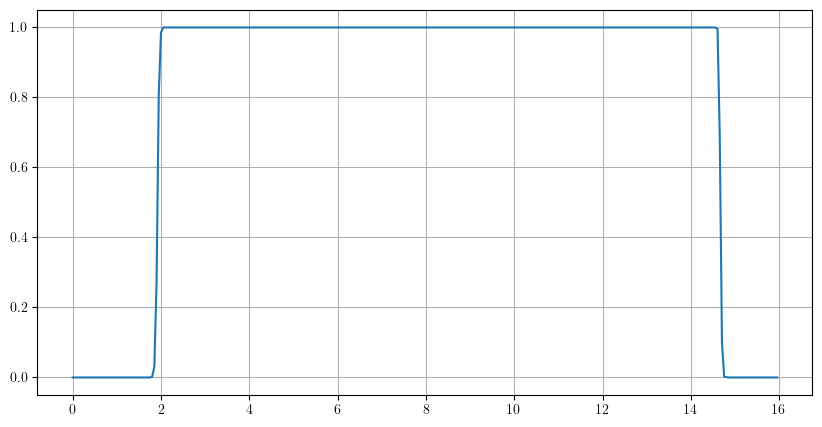

In [32]:
time = kappas.index.get_level_values('t').unique().to_list()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(time,np.abs(kappa_av)/4/N**2)
ax.grid()

plt.show()